In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random
df = pd.read_csv("advertising.csv")


In [2]:
def simulate_missing(df, missing_frac=0.1, seed=42):
    df_missing = df.copy()
    np.random.seed(seed)
    for col in df_missing.columns:
        if df_missing[col].dtype != 'object':
            n = len(df_missing)
            missing_indices = np.random.choice(n, int(missing_frac * n), replace=False)
            df_missing.loc[missing_indices, col] = np.nan
    return df_missing

In [3]:
def handle_missing(df, strategy='zero'):
    df_filled = df.copy()
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if strategy == 'zero':
                df_filled[col] = df[col].fillna(0)
            elif strategy == 'mean':
                df_filled[col] = df[col].fillna(df[col].mean())
            elif strategy == 'median':
                df_filled[col] = df[col].fillna(df[col].median())
    return df_filled


In [4]:
import pandas as pd

def min_max_scaling(df):
    df_scaled = df.copy()
    for col in df.columns:
        col_min = df[col].min()     
        col_max = df[col].max()     
        df_scaled[col] = (df[col] - col_min) / (col_max - col_min)  
    return df_scaled


In [5]:
def standard_scaling(df):
    df_scaled = df.copy()
    for col in df.columns:
        mean = df[col].mean()       
        std = df[col].std()         
        df_scaled[col] = (df[col] - mean) / std 
    return df_scaled


In [7]:
def detect_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    mask = (z_scores > threshold).any(axis=1)
    return mask


In [11]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

In [13]:
for res in results:
    print(res)

{'missing_strategy': 'zero', 'scaling': 'minmax', 'r2_full': 0.3833, 'r2_no_outliers': 0.3776}
{'missing_strategy': 'zero', 'scaling': 'standard', 'r2_full': 0.3833, 'r2_no_outliers': 0.3776}
{'missing_strategy': 'mean', 'scaling': 'minmax', 'r2_full': 0.7434, 'r2_no_outliers': 0.7392}
{'missing_strategy': 'mean', 'scaling': 'standard', 'r2_full': 0.7434, 'r2_no_outliers': 0.7392}
{'missing_strategy': 'median', 'scaling': 'minmax', 'r2_full': 0.7376, 'r2_no_outliers': 0.7334}
{'missing_strategy': 'median', 'scaling': 'standard', 'r2_full': 0.7376, 'r2_no_outliers': 0.7334}


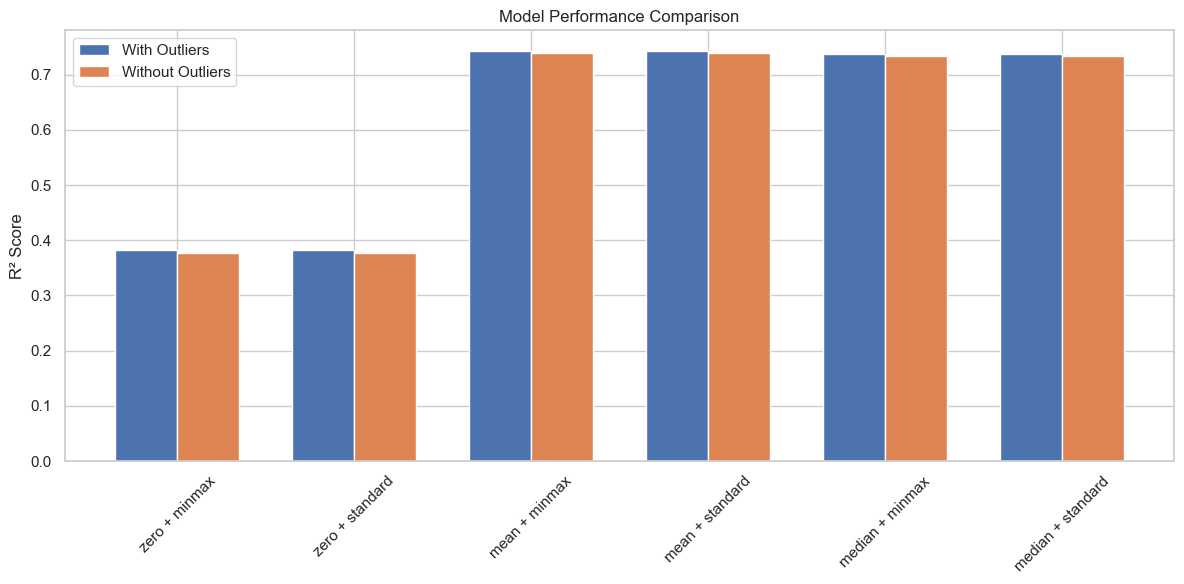

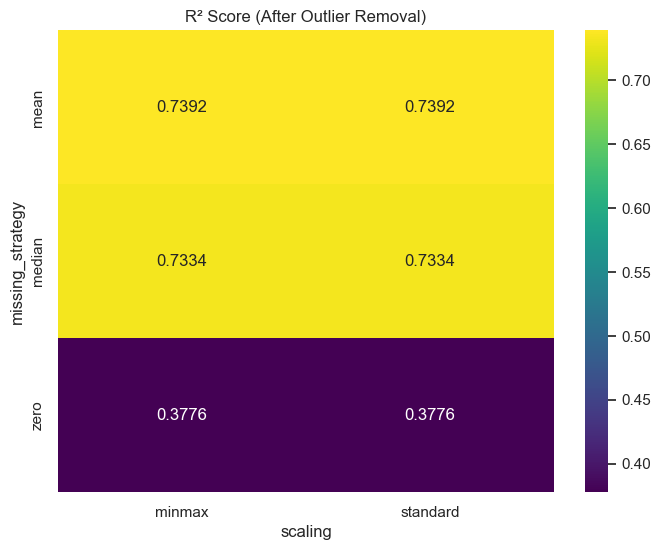

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
results_df = pd.DataFrame(results)

sns.set(style="whitegrid")

# Plot 1: R² with full data vs after outlier removal
plt.figure(figsize=(12, 6))
x_labels = results_df['missing_strategy'] + " + " + results_df['scaling']

x = range(len(x_labels))
width = 0.35

plt.bar([i - width/2 for i in x], results_df['r2_full'], width=width, label='With Outliers')
plt.bar([i + width/2 for i in x], results_df['r2_no_outliers'], width=width, label='Without Outliers')

plt.xticks(x, x_labels, rotation=45)
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

pivot_df = results_df.pivot(index="missing_strategy", columns="scaling", values="r2_no_outliers")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, fmt=".4f", cmap="viridis")
plt.title("R² Score (After Outlier Removal)")
plt.show()
